In [1]:
import pandas as pd

# Charger la base de données dans un DataFrame
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\scraping_sante\BD_ENTREPRISES.csv', encoding='windows-1252', sep=';')


In [2]:
# Parcourir toutes les cellules du DataFrame
data = data.applymap(lambda x: x.replace(',', '') if isinstance(x, str) else x)


In [3]:
import pandas as pd

# Charger la base de données dans un DataFrame
data = pd.read_csv(r'C:\Users\LENOVO\Desktop\scraping_sante\BD_ENTREPRISES.csv', encoding='windows-1252', sep=';')


In [4]:
print(data.head())


                                                 nom   secteur   region  \
0                               2M INDUSTRIES – SARL  agricule  Algérie   
1  AÇAN METAL ?N?AAT PLAST?K GER? DÖNÜ?ÜM SANAY? ...  agricule  Turquie   
2                                              ACEMO  agricule   France   
3                                  ACQUA AZZURRA SRL  agricule   Italie   
4                                    AD ASTRA S.R.L.  agricule   Italie   

                info  
0   +213 23 88 46 43  
1  +90 232 469 12 96  
2                  -  
3    393 667 873 560  
4    393 357 704 812  


In [5]:
print(data.dtypes)


nom        object
secteur    object
region     object
info       object
dtype: object


In [6]:
print(data.isnull().sum())


nom            0
secteur        0
region        92
info       43076
dtype: int64


In [7]:
unique_secteurs = data['secteur'].unique()
print(unique_secteurs)


['agricule' 'formation' 'medical']


In [9]:
secteur_counts = data['secteur'].value_counts()


In [10]:
print(secteur_counts)

medical      43076
agricule       446
formation      328
Name: secteur, dtype: int64


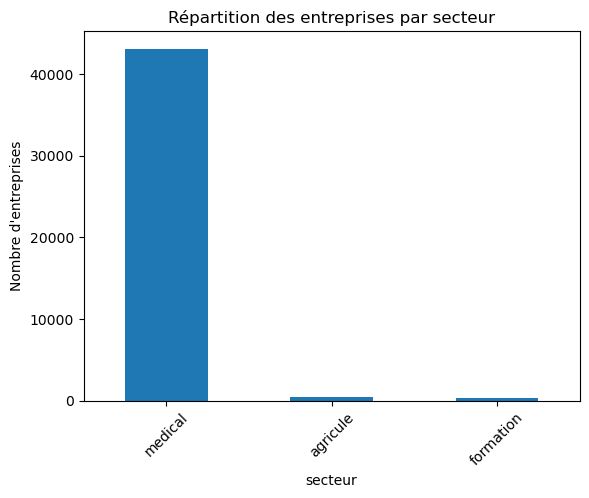

In [23]:
secteur_counts.plot(kind='bar')
plt.xlabel('secteur')
plt.ylabel('Nombre d\'entreprises')
plt.title('Répartition des entreprises par secteur')
plt.xticks(rotation=45)  # Pour faire pivoter les étiquettes sur l'axe x si nécessaire
plt.show()


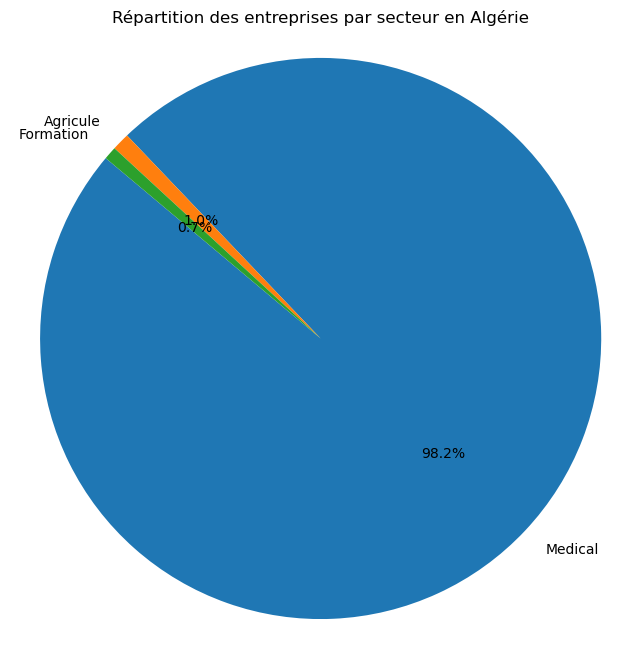

In [18]:
import matplotlib.pyplot as plt

# Exemple de données : nombre d'entreprises par secteur
secteurs = ['Medical', 'Agricule', 'Formation']
nombre_entreprises = [43076, 446, 328]  # Remplacez ces valeurs par les données de votre propre étude

# Créer un graphique à secteurs
plt.figure(figsize=(8, 8))
plt.pie(nombre_entreprises, labels=secteurs, autopct='%1.1f%%', startangle=140)

# Ajouter un titre
plt.title('Répartition des entreprises par secteur en Algérie')

# Afficher le graphique
plt.axis('equal')  # Pour que le graphique soit un cercle
plt.show()


In [17]:
import os
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd

# Chemin d'accès complet au répertoire contenant le fichier CSV
csv_directory = r"C:\Users\LENOVO\Desktop\scraping_sante\"
# Chemin d'accès complet au fichier CSV
csv_file_path = os.path.join(csv_directory, 'BD_ENTREPRISES.csv')

# Charger le jeu de données à partir du fichier CSV en utilisant le codec 'ISO-8859-1'
data = pd.read_csv(csv_file_path, sep=';', encoding='ISO-8859-1')

# Chemin d'accès complet au fichier shapefile de l'Algérie (si dans le même répertoire que le CSV)
shapefile_path = os.path.join(csv_directory, 'algerie.shp')

# Charger le shapefile de l'Algérie
algeria_map = gpd.read_file(shapefile_path)

# Reste du code pour créer la carte...
# Regrouper les données par région et compter le nombre d'entreprises par région
entreprises_par_region = data.groupby('region').size().reset_index(name='nombre_entreprises')

# Convertir la colonne 'nombre_entreprises' en type int64
entreprises_par_region['nombre_entreprises'] = entreprises_par_region['nombre_entreprises'].astype(int)

# Fusionner les données des régions avec la carte géographique
algeria_map = algeria_map.merge(entreprises_par_region, left_on='NOM_REGION', right_on='region', how='left')

# Créer la carte
fig, ax = plt.subplots(1, 1, figsize=(12, 8))
algeria_map.plot(column='nombre_entreprises', cmap='YlGnBu', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)
ax.set_title('Répartition des entreprises par région en Algérie')
ax.axis('off')  # Masquer les axes
plt.show()

SyntaxError: EOL while scanning string literal (2696510171.py, line 7)